import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


<h1> Image Loading and showing </h1>

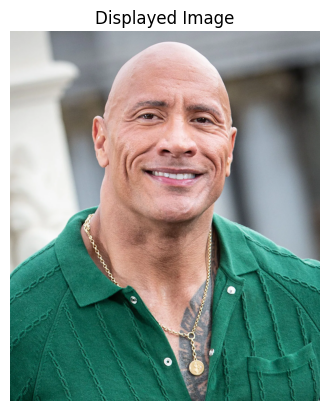

In [ ]:
# Load the image using OpenCV (this gives us a NumPy array)
image = cv2.imread("the_rock.png")  # Load in BGR format


# Display the image using Matplotlib
#plt.imshow(image) #wrong
# Convert the image from BGR to RGB for correct display in Matplotlib
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.axis("off")  # Hide axis
plt.title("Displayed Image")
plt.show()

#alternative
cv2.imshow("Displayed Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Acquire live image

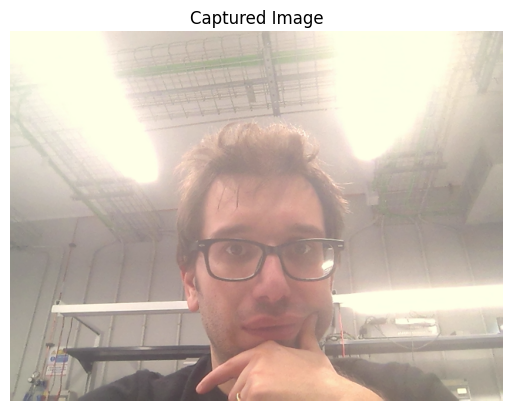

In [3]:
# Open webcam (0 is the default camera)
cap = cv2.VideoCapture(0) #you might need to change the index!

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Capture a single frame
ret, frame = cap.read()

if ret:
    # Convert (BGR) to (RGB)
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display using Matplotlib
    plt.imshow(image)
    plt.axis("off")  # Hide axis for a cleaner view
    plt.title("Captured Image")
    plt.show()

    # Save the image (optional)
    #image.save("me.jpg")
else:
    print("Error: Could not capture image.")

# Release the webcam
cap.release()






Acquire and display video

In [4]:
# Open the default camera (0 = first camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Display the frame
    cv2.imshow("Live Camera Feed", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()


<h1> Image cropping </h1> 

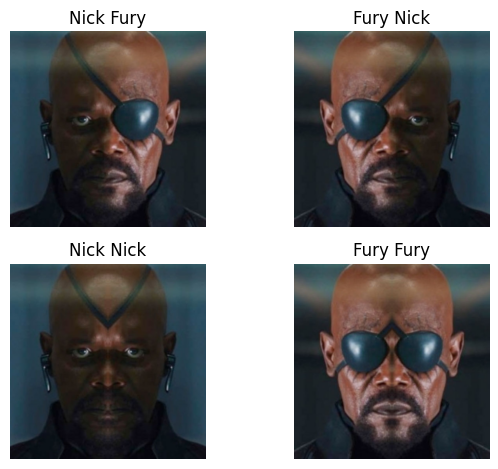

In [5]:
I_nf = cv2.imread("nick_fury.png")
I_nf = cv2.cvtColor(I_nf, cv2.COLOR_BGR2RGB)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2)

# Display Nick Fury image
axs[0, 0].imshow(I_nf)
axs[0, 0].set_title('Nick Fury')
axs[0, 0].axis('off')

# Flip image horizontally (flip left-right)
I_fn = I_nf[:,::-1,:]
# or I_fn = np.fliplr(I_nf)
axs[0, 1].imshow(I_fn)
axs[0, 1].set_title('Fury Nick')
axs[0, 1].axis('off')

# Create "Nick Nick" image by combining parts of original and flipped image
I_nn = I_nf.copy()
I_nn[:, I_nn.shape[1] // 2:, :] = I_fn[:, I_fn.shape[1] // 2:, :]
axs[1, 0].imshow(I_nn)
axs[1, 0].set_title('Nick Nick')
axs[1, 0].axis('off')

# Create "Fury Fury" image by combining parts of original and flipped image
I_ff = I_nf.copy()
I_ff[:, :I_ff.shape[1] // 2,:] = I_fn[:, :I_fn.shape[1] // 2, :]
axs[1, 1].imshow(I_ff)
axs[1, 1].set_title('Fury Fury')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

<h1> Colorspaces </h1>

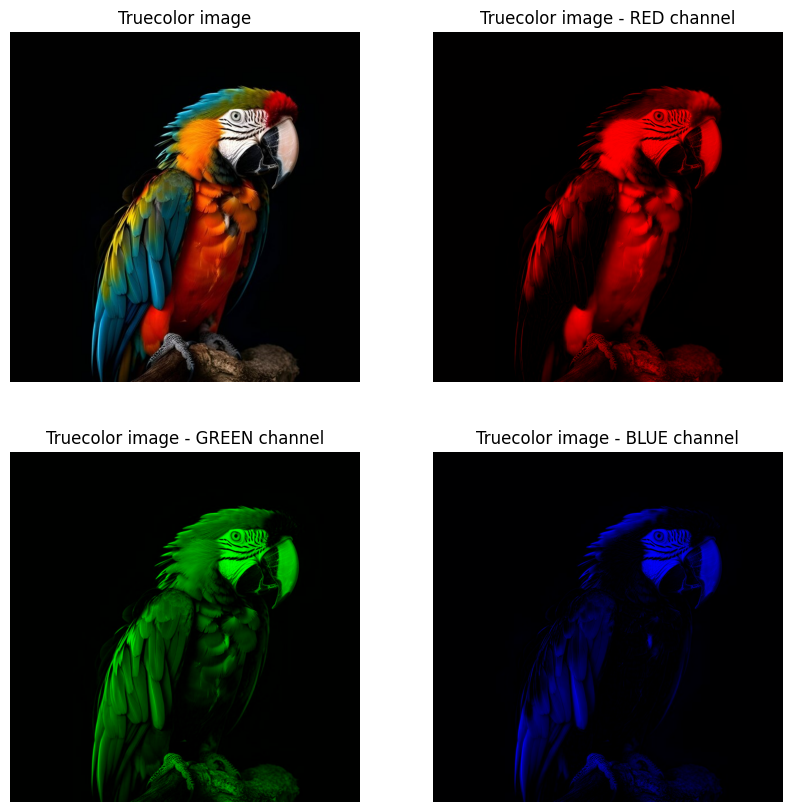

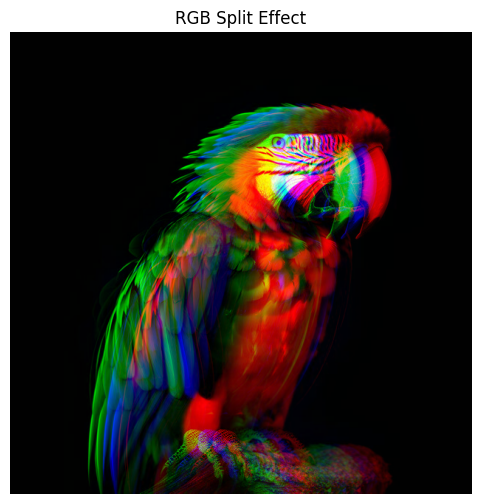

In [6]:
# Load image
I  = cv2.imread("parrot.png")
I  = cv2.cvtColor(I , cv2.COLOR_BGR2RGB)

# Extract color channels
I_r, I_g, I_b = I[:,:,0], I[:,:,1], I[:,:,2]

# Display original and channel-separated images
null_image = np.zeros_like(I)
I_r_vis = null_image.copy()
I_r_vis[:,:,0] = I_r
I_g_vis = null_image.copy()
I_g_vis[:,:,1] = I_g
I_b_vis = null_image.copy()
I_b_vis[:,:,2] = I_b

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(I)
axs[0, 0].set_title('Truecolor image')
axs[0, 1].imshow(I_r_vis)
axs[0, 1].set_title('Truecolor image - RED channel')
axs[1, 0].imshow(I_g_vis)
axs[1, 0].set_title('Truecolor image - GREEN channel')
axs[1, 1].imshow(I_b_vis)
axs[1, 1].set_title('Truecolor image - BLUE channel')

for ax in axs.flat:
    ax.axis('off')
plt.show()

# RGB split channels effect
k = 20
I_r_out = I_r_vis.copy()
I_g_out = np.roll(I_g_vis, -k*2, axis=1)
I_b_out = np.roll(I_b_vis, -k, axis=1)
I_out = I_r_out + I_g_out + I_b_out

plt.figure(figsize=(6, 6))
plt.imshow(I_out)
plt.axis('off')
plt.title('RGB Split Effect')
plt.show()

<h1>Skin segmentation</h1>

In [7]:
APPLY_MORPH = True

def skin_segmentation(image):
    # Define skin color ranges in HSV and YCrCb
    lower_hsv = np.array([0, 48, 80], dtype=np.uint8)
    upper_hsv = np.array([20, 255, 255], dtype=np.uint8)

    lower_ycrcb = np.array([0, 133, 77], dtype=np.uint8)
    upper_ycrcb = np.array([255, 173, 127], dtype=np.uint8)

    # Convert to HSV and YCrCb color spaces
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)

    # Create skin masks
    mask_hsv = cv2.inRange(hsv, lower_hsv, upper_hsv)
    mask_ycrcb = cv2.inRange(ycrcb, lower_ycrcb, upper_ycrcb)

    # Combine both masks
    skin_mask = cv2.bitwise_and(mask_hsv, mask_ycrcb)

    return skin_mask



# Open webcam
cap = cv2.VideoCapture(0)


while True:
    ret, frame = cap.read()
    if not ret:
        break        

    skin_mask = skin_segmentation(frame)

    if(APPLY_MORPH):
        # Apply morphological operations to remove noise
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
        skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)

    # Apply mask to the original frame
    skin_result = cv2.bitwise_and(frame, frame, mask=skin_mask)

    # Display original and skin-detected output
    cv2.imshow("Skin Detection", skin_result)

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


<h1> Edge detection </h1>

In [8]:
apply_lowpass = True

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if(apply_lowpass):
        # Apply Gaussian blur to reduce noise
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    #edges = cv2.Canny(gray, 50, 150)  # Adjust thresholds for different effects
    edges = cv2.Canny(gray, 25, 50)  # Adjust thresholds for different effects

    # Stack original and edge-detected images side by side
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    combined = cv2.hconcat([frame, edges_colored])

    # Display the output
    cv2.imshow("Live Edge Detection", combined)

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

<h1> Face Detection </h1>

In [9]:
# Load the pre-trained face detector (Haar cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the webcam (0 for default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break  # Exit loop if there's an issue with the camera

    # Convert to grayscale (Viola-Jones works on grayscale images)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the output
    cv2.imshow('Viola-Jones Face Detection', frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


<h1> Smile detection </h1>

In [ ]:
# Load the pre-trained face and smile cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start the video capture (use webcam)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    gray = cv2.GaussianBlur(gray, (5, 5), 0.5)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 3,minSize=(100, 100))

    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Region of interest (ROI) for mouth detection
        x_smile = x+int(2*w/7)
        w_smile = int(3*w/7)
        y_smile = y + int(6*h / 10)
        h_smile = int(3*h / 10)
        smile_region = gray[y_smile:y_smile + h_smile, x_smile:x_smile + w_smile]  # Region around the mouth

        # Draw rectangle around the smile
        cv2.rectangle(frame, (x_smile, y_smile), (x_smile+w_smile, y_smile + h_smile), (0, 0, 255), 2)

        # Apply Canny edge detection on the smile region
        edges = cv2.Canny(smile_region, threshold1=1, threshold2=100)

        # Count the number of edges (white pixels in the edges image)
        edge_count = np.sum(edges == 255)

        # Set a threshold for edge density to determine if the person is smiling
        #if edge_count > 100:  # Adjust this threshold depending on your experiment
        if edge_count > 500:  # Adjust this threshold depending on your experiment
            cv2.putText(frame, "Smiling", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        else:
            cv2.putText(frame, "Not Smiling", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow("Smile Detection", frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


<h1>Optical Flow</h1>

In [18]:
# Open webcam
cap = cv2.VideoCapture(0)

# Read the first frame and convert it to grayscale
ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

while True:
    # Read the next frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute dense optical flow using Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Convert flow to HSV format
    hsv = np.zeros_like(frame)
    hsv[..., 1] = 255  # Set maximum saturation

    # Compute magnitude and angle of flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Set hue based on the flow direction
    hsv[..., 0] = ang * 180 / np.pi / 2

    # Set value based on flow magnitude (normalized)
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to BGR for visualization
    flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Display the flow visualization
    cv2.imshow('Optical Flow (Farneback)', flow_rgb)

    # Update the previous frame
    prev_gray = gray.copy()

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


<h1> Optical Flow for motion direction </h1>

In [3]:
# Open webcam
cap = cv2.VideoCapture(0)

# Read the first frame and convert to grayscale
ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Create mask for drawing optical flow
hsv_mask = np.zeros_like(prev_frame)
hsv_mask[..., 1] = 255  # Set saturation to max

# Threshold for minimum movement detection
motion_threshold = 50000  # Adjust this based on noise level

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute optical flow (Farneback method)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Convert flow to polar coordinates (magnitude and angle)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Set HSV mask values
    hsv_mask[..., 0] = ang * 180 / np.pi / 2  # Hue (direction)
    hsv_mask[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)  # Value (magnitude)

    # Convert HSV to BGR for display
    bgr_flow = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)

    # Compute total motion magnitude
    total_magnitude = np.sum(mag)

    # If motion is too small, set as "Stable"
    if total_magnitude < motion_threshold:
        direction_text = "Stable"
        color = (255, 255, 255)  # White
    else:
        # Convert angles from radians to degrees
        ang_degrees = np.degrees(ang)

        # Mask for rightward motion (angles < 90° or > 270°)
        right_mask = (ang_degrees < 90) | (ang_degrees > 270)
        left_mask = (ang_degrees >= 90) & (ang_degrees <= 270)

        # Sum of magnitudes in left and right directions
        right_magnitude = np.sum(mag[right_mask])
        left_magnitude = np.sum(mag[left_mask])

        # Assign movement direction based on dominant motion
        if right_magnitude > left_magnitude:
            direction_text = "Moving Right"
            color = (0, 0, 255)
        else:
            direction_text = "Moving Left"
            color = (255, 0, 0) 

    # Display movement direction on screen
    cv2.putText(bgr_flow, direction_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Show result
    cv2.imshow("Optical Flow", bgr_flow)

    # Update previous frame
    prev_gray = gray.copy()

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
